In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Загрузка данных
data = pd.read_csv("company_financial_data.csv")

# Первые строки данных
data.head()

,Год,Месяц,Подразделение,Выручка,Чистая прибыль,Операционные расходы,Активы,Обязательства,Коэффициент текущей ликвидности,Доля рынка,Количество сотрудников,Рентабельность продаж,Оборачиваемость активов,Рентабельность активов,Долговая нагрузка
0,2018,Январь,Подразделение_1,1099632.10,223094.43,820764.06,485214.29,252181.25,2.51,10.58,287,20.29,2.27,45.98,51.97
1,2018,Январь,Подразделение_2,1066966.89,230313.17,779075.42,242860.05,99884.04,2.71,10.01,476,21.59,4.39,94.83,41.13
2,2018,Январь,Подразделение_3,1293985.21,412612.28,778219.86,383495.95,155167.25,3.28,10.47,387,31.89,3.37,107.59,40.46
3,2018,Январь,Подразделение_4,1093089.47,212465.82,827507.20,336821.00,148179.26,2.73,10.46,334,19.44,3.25,63.08,43.99
4,2018,Январь,Подразделение_5,936419.30,157485.42,739562.53,219515.48,130200.43,2.62,10.98,291,16.82,4.27,71.74,59.31


In [3]:
# Информация о датасете
print(data.info())

# Описательная статистика
print(data.describe())

# Проверка пропущенных значений
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Год                              15000 non-null  int64  
 1   Месяц                            15000 non-null  object 
 2   Подразделение                    15000 non-null  object 
 3   Выручка                          15000 non-null  float64
 4   Чистая прибыль                   15000 non-null  float64
 5   Операционные расходы             15000 non-null  float64
 6   Активы                           15000 non-null  float64
 7   Обязательства                    15000 non-null  float64
 8   Коэффициент текущей ликвидности  15000 non-null  float64
 9   Доля рынка                       15000 non-null  float64
 10  Количество сотрудников           15000 non-null  int64  
 11  Рентабельность продаж            15000 non-null  float64
 12  Оборачиваемость ак

In [4]:
# Преобразование месяцев в числовые значения
months_mapping = {
    "Январь": 1, "Февраль": 2, "Март": 3, "Апрель": 4,
    "Май": 5, "Июнь": 6, "Июль": 7, "Август": 8,
    "Сентябрь": 9, "Октябрь": 10, "Ноябрь": 11, "Декабрь": 12
}
data["Месяц"] = data["Месяц"].map(months_mapping)

# Проверка преобразования
data.head()

,Год,Месяц,Подразделение,Выручка,Чистая прибыль,Операционные расходы,Активы,Обязательства,Коэффициент текущей ликвидности,Доля рынка,Количество сотрудников,Рентабельность продаж,Оборачиваемость активов,Рентабельность активов,Долговая нагрузка
0,2018,1,Подразделение_1,1099632.10,223094.43,820764.06,485214.29,252181.25,2.51,10.58,287,20.29,2.27,45.98,51.97
1,2018,1,Подразделение_2,1066966.89,230313.17,779075.42,242860.05,99884.04,2.71,10.01,476,21.59,4.39,94.83,41.13
2,2018,1,Подразделение_3,1293985.21,412612.28,778219.86,383495.95,155167.25,3.28,10.47,387,31.89,3.37,107.59,40.46
3,2018,1,Подразделение_4,1093089.47,212465.82,827507.20,336821.00,148179.26,2.73,10.46,334,19.44,3.25,63.08,43.99
4,2018,1,Подразделение_5,936419.30,157485.42,739562.53,219515.48,130200.43,2.62,10.98,291,16.82,4.27,71.74,59.31


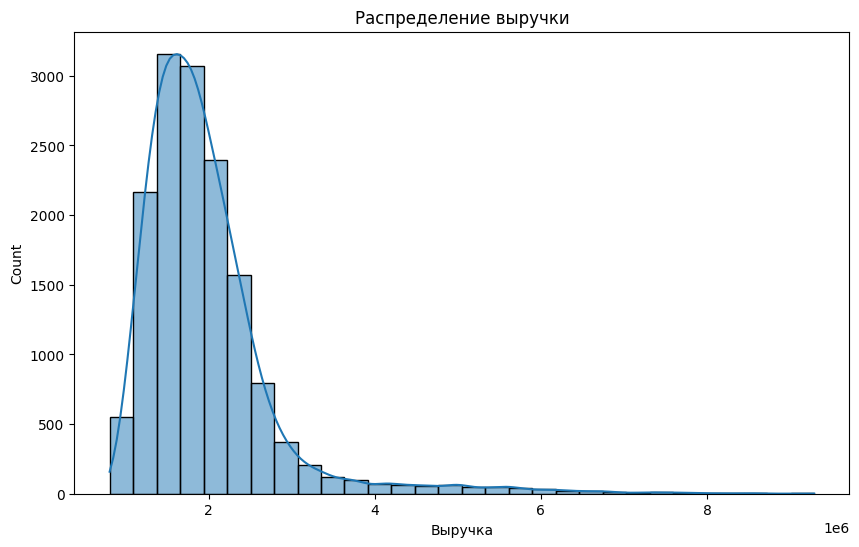

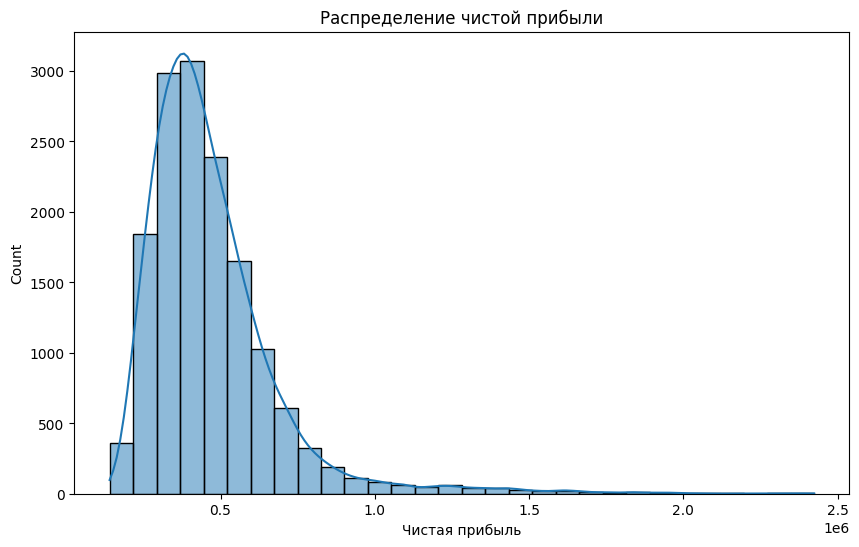

In [5]:
# Распределение выручки
plt.figure(figsize=(10, 6))
sns.histplot(data["Выручка"], kde=True, bins=30)
plt.title("Распределение выручки")
plt.show()

# Распределение чистой прибыли
plt.figure(figsize=(10, 6))
sns.histplot(data["Чистая прибыль"], kde=True, bins=30)
plt.title("Распределение чистой прибыли")
plt.show()

Числовые столбцы:
Index(['Год', 'Месяц', 'Выручка', 'Чистая прибыль', 'Операционные расходы',
       'Активы', 'Обязательства', 'Коэффициент текущей ликвидности',
       'Доля рынка', 'Количество сотрудников', 'Рентабельность продаж',
       'Оборачиваемость активов', 'Рентабельность активов',
       'Долговая нагрузка'],
      dtype='object')


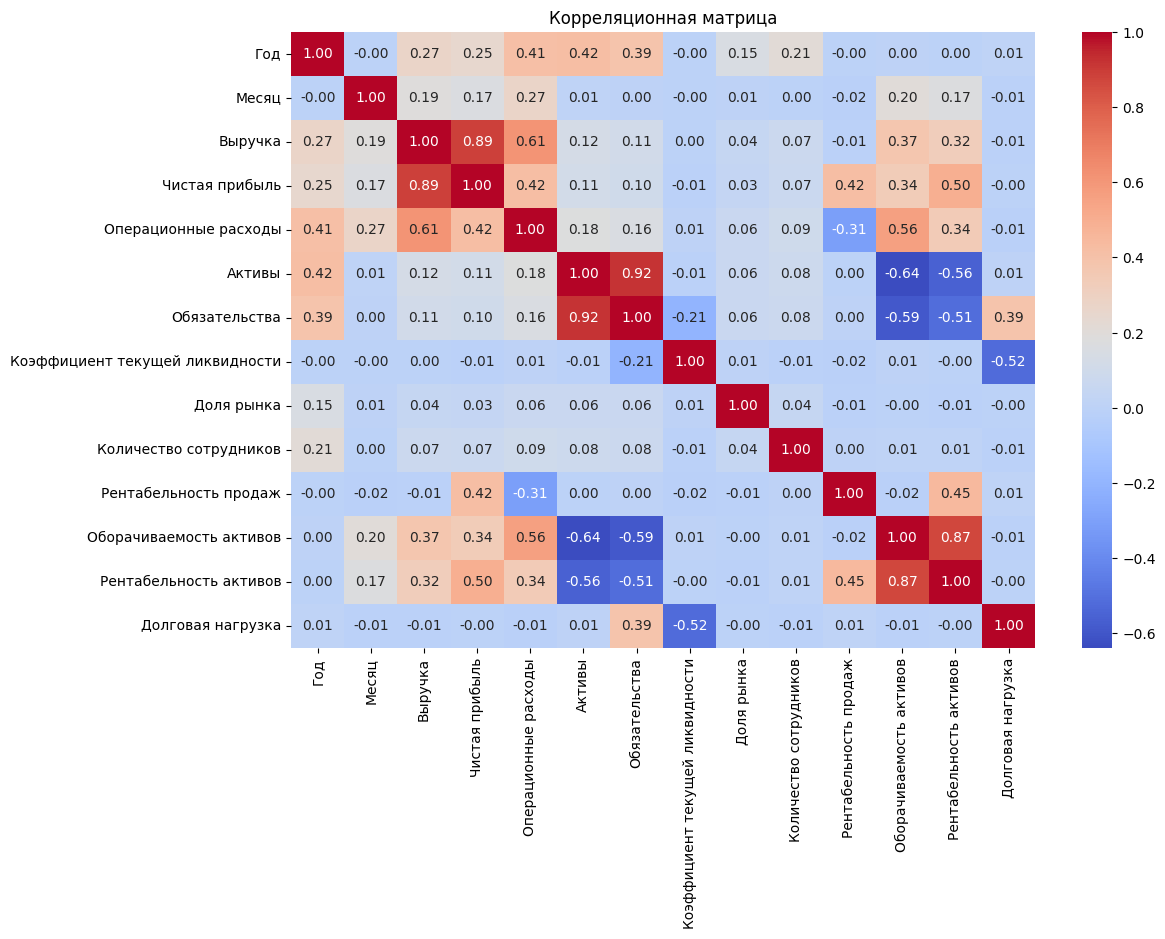

In [7]:
# Удаляем нечисловые столбцы (например, "Подразделение")
numeric_data = data.select_dtypes(include=[np.number])

# Проверяем, какие столбцы остались
print("Числовые столбцы:")
print(numeric_data.columns)

# Вычисляем корреляционную матрицу
correlation_matrix = numeric_data.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


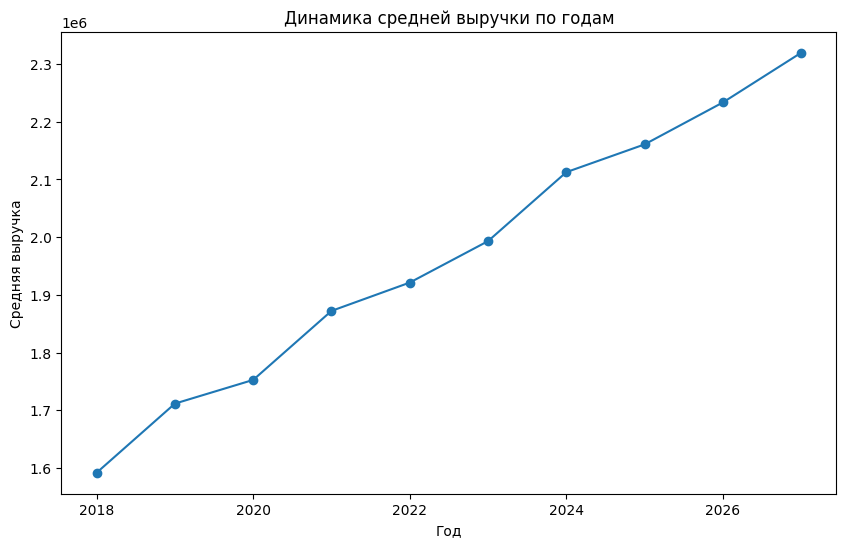

In [8]:
# График динамики выручки по годам
plt.figure(figsize=(10, 6))
data.groupby("Год")["Выручка"].mean().plot(kind="line", marker="o")
plt.title("Динамика средней выручки по годам")
plt.xlabel("Год")
plt.ylabel("Средняя выручка")
plt.show()

In [9]:
# Выбор признаков и целевой переменной
X = data[["Год", "Месяц", "Выручка", "Операционные расходы", "Активы", "Обязательства"]]
y = data["Чистая прибыль"]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Обучение линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse}")

Среднеквадратичная ошибка: 7654717828.546511


In [11]:
import joblib

# Сохранение модели
joblib.dump(model, "trained_model.joblib")

['trained_model.joblib']